In [47]:
import pandas as pd

In [48]:
x = pd.read_csv('credit_card/train.csv')
y = pd.read_csv('credit_card/test.csv')
df = pd.concat([x, y])
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [49]:
df.dropna(inplace = True)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    object 
 2   Married            480 non-null    object 
 3   Dependents         480 non-null    object 
 4   Education          480 non-null    object 
 5   Self_Employed      480 non-null    object 
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    object 
 12  Loan_Status        480 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 52.5+ KB


In [51]:
df.drop('Loan_ID', axis = 1, inplace = True)

<AxesSubplot:xlabel='Credit_History'>

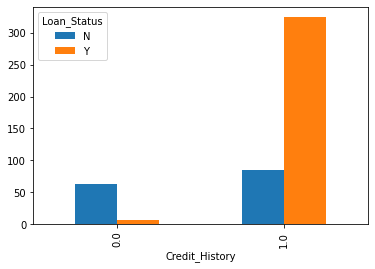

In [52]:
pd.crosstab(df.Credit_History, df.Loan_Status).plot(kind='bar')

In [53]:
df.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N
10,Male,Yes,2,Graduate,No,3200,700.0,70.0,360.0,1.0,Urban,Y


In [54]:
df['Sex'] = df['Gender'].apply(lambda x: 1 if x =='Male' else 0 )
df['Married?'] = df['Married'].apply(lambda x: 1 if x =='Yes' else 0)
df['Graduate'] = df['Education'].apply(lambda x: 1 if x =='Graduate' else 0)
df['SE'] = df['Self_Employed'].apply(lambda x: 1 if x == 'Yes' else 0)
df.drop(['Gender', 'Married', 'Education', 'Self_Employed'], axis = 1, inplace = True)
df.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Sex,Married?,Graduate,SE
1,1,4583,1508.0,128.0,360.0,1.0,Rural,N,1,1,1,0
2,0,3000,0.0,66.0,360.0,1.0,Urban,Y,1,1,1,1
3,0,2583,2358.0,120.0,360.0,1.0,Urban,Y,1,1,0,0
4,0,6000,0.0,141.0,360.0,1.0,Urban,Y,1,0,1,0
5,2,5417,4196.0,267.0,360.0,1.0,Urban,Y,1,1,1,1


In [55]:
df

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Sex,Married?,Graduate,SE
1,1,4583,1508.0,128.0,360.0,1.0,Rural,N,1,1,1,0
2,0,3000,0.0,66.0,360.0,1.0,Urban,Y,1,1,1,1
3,0,2583,2358.0,120.0,360.0,1.0,Urban,Y,1,1,0,0
4,0,6000,0.0,141.0,360.0,1.0,Urban,Y,1,0,1,0
5,2,5417,4196.0,267.0,360.0,1.0,Urban,Y,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,2900,0.0,71.0,360.0,1.0,Rural,Y,0,0,1,0
610,3+,4106,0.0,40.0,180.0,1.0,Rural,Y,1,1,1,0
611,1,8072,240.0,253.0,360.0,1.0,Urban,Y,1,1,1,0
612,2,7583,0.0,187.0,360.0,1.0,Urban,Y,1,1,1,0


In [56]:
dummies = pd.get_dummies(df.Dependents, prefix = 'Dependents')
dummies
new_df = pd.concat([df, dummies], axis = 1)
new_df

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Sex,Married?,Graduate,SE,Dependents_0,Dependents_1,Dependents_2,Dependents_3+
1,1,4583,1508.0,128.0,360.0,1.0,Rural,N,1,1,1,0,0,1,0,0
2,0,3000,0.0,66.0,360.0,1.0,Urban,Y,1,1,1,1,1,0,0,0
3,0,2583,2358.0,120.0,360.0,1.0,Urban,Y,1,1,0,0,1,0,0,0
4,0,6000,0.0,141.0,360.0,1.0,Urban,Y,1,0,1,0,1,0,0,0
5,2,5417,4196.0,267.0,360.0,1.0,Urban,Y,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,2900,0.0,71.0,360.0,1.0,Rural,Y,0,0,1,0,1,0,0,0
610,3+,4106,0.0,40.0,180.0,1.0,Rural,Y,1,1,1,0,0,0,0,1
611,1,8072,240.0,253.0,360.0,1.0,Urban,Y,1,1,1,0,0,1,0,0
612,2,7583,0.0,187.0,360.0,1.0,Urban,Y,1,1,1,0,0,0,1,0


In [57]:
new_df.drop('Dependents', axis = 1, inplace = True)

In [58]:
dummy = pd.get_dummies(df.Property_Area, prefix ='Property_Location')
dummy

,Property_Location_Rural,Property_Location_Semiurban,Property_Location_Urban
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
5,0,0,1
...,...,...,...
609,1,0,0
610,1,0,0
611,0,0,1
612,0,0,1


In [59]:
final_df = pd.concat([new_df, dummy], axis = 1)
final_df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Sex,Married?,Graduate,SE,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Location_Rural,Property_Location_Semiurban,Property_Location_Urban
1,4583,1508.0,128.0,360.0,1.0,Rural,N,1,1,1,0,0,1,0,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,Urban,Y,1,1,1,1,1,0,0,0,0,0,1
3,2583,2358.0,120.0,360.0,1.0,Urban,Y,1,1,0,0,1,0,0,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,Urban,Y,1,0,1,0,1,0,0,0,0,0,1
5,5417,4196.0,267.0,360.0,1.0,Urban,Y,1,1,1,1,0,0,1,0,0,0,1


In [60]:
final_df

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Sex,Married?,Graduate,SE,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Location_Rural,Property_Location_Semiurban,Property_Location_Urban
1,4583,1508.0,128.0,360.0,1.0,Rural,N,1,1,1,0,0,1,0,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,Urban,Y,1,1,1,1,1,0,0,0,0,0,1
3,2583,2358.0,120.0,360.0,1.0,Urban,Y,1,1,0,0,1,0,0,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,Urban,Y,1,0,1,0,1,0,0,0,0,0,1
5,5417,4196.0,267.0,360.0,1.0,Urban,Y,1,1,1,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,Rural,Y,0,0,1,0,1,0,0,0,1,0,0
610,4106,0.0,40.0,180.0,1.0,Rural,Y,1,1,1,0,0,0,0,1,1,0,0
611,8072,240.0,253.0,360.0,1.0,Urban,Y,1,1,1,0,0,1,0,0,0,0,1
612,7583,0.0,187.0,360.0,1.0,Urban,Y,1,1,1,0,0,0,1,0,0,0,1


In [61]:
final_df['Credit_Approval'] = df['Loan_Status'].apply(lambda x: 1 if x =='Y' else 0)
final_df

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Sex,Married?,Graduate,SE,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Location_Rural,Property_Location_Semiurban,Property_Location_Urban,Credit_Approval
1,4583,1508.0,128.0,360.0,1.0,Rural,N,1,1,1,0,0,1,0,0,1,0,0,0
2,3000,0.0,66.0,360.0,1.0,Urban,Y,1,1,1,1,1,0,0,0,0,0,1,1
3,2583,2358.0,120.0,360.0,1.0,Urban,Y,1,1,0,0,1,0,0,0,0,0,1,1
4,6000,0.0,141.0,360.0,1.0,Urban,Y,1,0,1,0,1,0,0,0,0,0,1,1
5,5417,4196.0,267.0,360.0,1.0,Urban,Y,1,1,1,1,0,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,Rural,Y,0,0,1,0,1,0,0,0,1,0,0,1
610,4106,0.0,40.0,180.0,1.0,Rural,Y,1,1,1,0,0,0,0,1,1,0,0,1
611,8072,240.0,253.0,360.0,1.0,Urban,Y,1,1,1,0,0,1,0,0,0,0,1,1
612,7583,0.0,187.0,360.0,1.0,Urban,Y,1,1,1,0,0,0,1,0,0,0,1,1


In [66]:
final_df

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Sex,Married?,Graduate,SE,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Location_Rural,Property_Location_Semiurban,Property_Location_Urban,Credit_Approval
1,4583,1508.0,128.0,360.0,1.0,1,1,1,0,0,1,0,0,1,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,1,1,1,0,0,0,0,0,1,1
3,2583,2358.0,120.0,360.0,1.0,1,1,0,0,1,0,0,0,0,0,1,1
4,6000,0.0,141.0,360.0,1.0,1,0,1,0,1,0,0,0,0,0,1,1
5,5417,4196.0,267.0,360.0,1.0,1,1,1,1,0,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,0,0,1,0,1,0,0,0,1,0,0,1
610,4106,0.0,40.0,180.0,1.0,1,1,1,0,0,0,0,1,1,0,0,1
611,8072,240.0,253.0,360.0,1.0,1,1,1,0,0,1,0,0,0,0,1,1
612,7583,0.0,187.0,360.0,1.0,1,1,1,0,0,0,1,0,0,0,1,1


In [69]:
X = final_df.drop('Credit_Approval', axis = 1)
X

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Sex,Married?,Graduate,SE,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Location_Rural,Property_Location_Semiurban,Property_Location_Urban
1,4583,1508.0,128.0,360.0,1.0,1,1,1,0,0,1,0,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,1,1,1,0,0,0,0,0,1
3,2583,2358.0,120.0,360.0,1.0,1,1,0,0,1,0,0,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,1,0,1,0,1,0,0,0,0,0,1
5,5417,4196.0,267.0,360.0,1.0,1,1,1,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,0,0,1,0,1,0,0,0,1,0,0
610,4106,0.0,40.0,180.0,1.0,1,1,1,0,0,0,0,1,1,0,0
611,8072,240.0,253.0,360.0,1.0,1,1,1,0,0,1,0,0,0,0,1
612,7583,0.0,187.0,360.0,1.0,1,1,1,0,0,0,1,0,0,0,1


In [70]:
Y = final_df['Credit_Approval']
Y

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Credit_Approval, Length: 480, dtype: int64

## Model Creation 

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [78]:
clf = SVC()
clf.fit(X_train, y_train)

SVC()

In [79]:
clf.predict(X_test[:10])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [80]:
y_test[:10]

37     1
115    1
12     1
315    1
527    1
409    0
211    0
324    1
316    1
452    0
Name: Credit_Approval, dtype: int64

In [81]:
clf.score(X_test, y_test)

0.71875